In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import src
from matplotlib import font_manager, rc

colors = src.colors
font_path = "C:/Windows/Fonts/NGULIM.TTF"

font = font_manager.FontProperties(fname=font_path).get_name()

rc('font', family=font)

## 시대 데이터 더 좁은 범위로 묶기

In [166]:
df = pd.read_csv('./data.csv')
df['시대'].unique()

array(['조선시대', '조선 중기', '신라시대', '정보 미제공', '조선시대 후기', '고려말∼조선시대', '조선후기',
       '조선전기', '조선시대 초기', '조선시대 말기', '백제시대', '고려시대 추정', '조선말기',
       '현종 6년(1840', '조선 고종 15년(', '1976년', '1961년', '1922년', '고려시대',
       '청동기시대', '삼국시대', '건립년도:1969년', '건립년도 : 1927'], dtype=object)

In [167]:
df[df['시대']=='신라시대']

,구분,문화재명,소재지,위도,경도,지정번호,시대,지정일,면적,소개,데이터기준일자
2,국가지정문화재,금산 요광리 은행나무,충청남도 금산군 추부면 요광리 329-12,36.21109,127.493121,천연기념물 제84호,신라시대,1962-12-07,"1본, 높이 20.5m, 둘레 15.5m, 밑둥둘레 12.4m","이 은행나무는 신라 때부터 자연정자(自然亭子)를 이루었다고 전해지므로, 나무의 나이...",2024-03-31


In [168]:
df.loc[df['시대'].str.contains('조선'), '시대'] = '조선시대'
df.loc[df['시대'].str.contains('고려'), '시대'] = '고려시대'
df.loc[df['시대'] == '현종 6년(1840', '시대'] = '조선시대'
df.loc[(df['시대'] == '1922년') | (df['시대'] == '건립년도 : 1927'), '시대'] ='대한민국 임시정부'
df.loc[(df['시대'] == '1976년') | (df['시대'] == '1961년') | (df['시대'] == '건립년도:1969년'), '시대'] = '현대'
df.loc[(df['시대'] =='신라시대') | (df['시대'] == '백제시대'), '시대'] = '삼국시대'

In [169]:
df['시대'].unique()

array(['조선시대', '삼국시대', '정보 미제공', '고려시대', '현대', '대한민국 임시정부', '청동기시대'],
      dtype=object)

In [170]:
era_counts = list()

for i in df['시대'].unique():
    e = int(df.loc[df['시대']==i, '시대'].value_counts())
    era_counts.append(e)
print(era_counts)

[18, 3, 39, 4, 3, 2, 2]


C:\Users\daega\AppData\Local\Temp\ipykernel_18732\3357565221.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  e = int(df.loc[df['시대']==i, '시대'].value_counts())
C:\Users\daega\AppData\Local\Temp\ipykernel_18732\3357565221.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  e = int(df.loc[df['시대']==i, '시대'].value_counts())
C:\Users\daega\AppData\Local\Temp\ipykernel_18732\3357565221.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  e = int(df.loc[df['시대']==i, '시대'].value_counts())
C:\Users\daega\AppData\Local\Temp\ipykernel_18732\3357565221.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  e = int(df.loc[df[

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


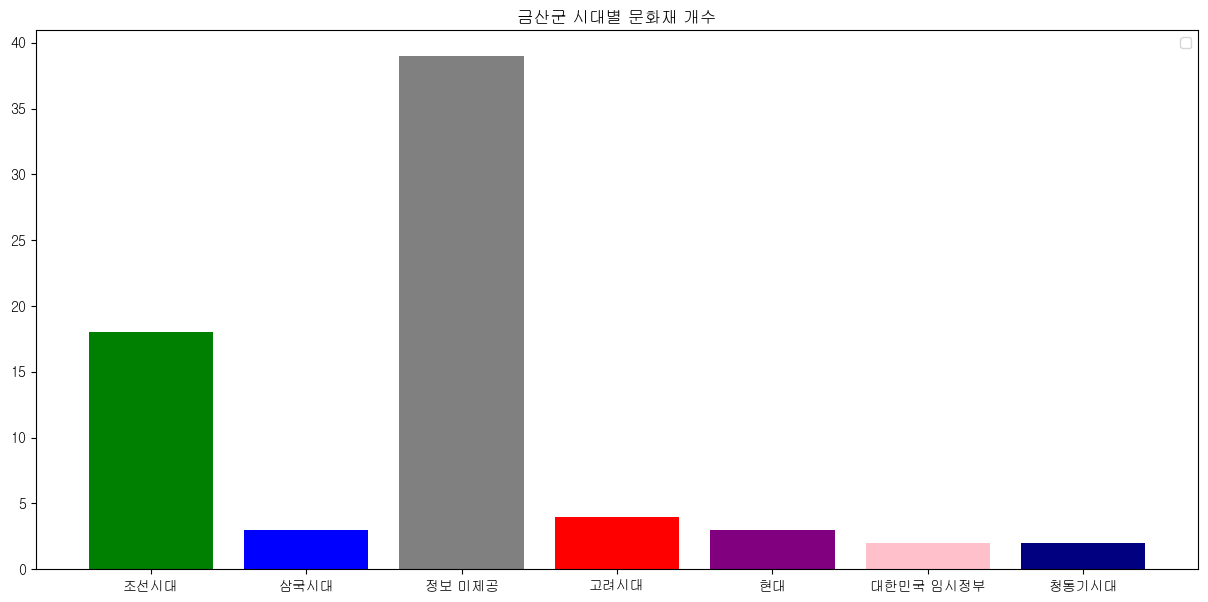

In [171]:
plt.figure(figsize=(15,7))

plt.title('금산군 시대별 문화재 개수')
plt.legend()
plt.bar(df['시대'].unique(),  era_counts, color=colors)

plt.show()

In [172]:
df.to_csv('./datas/processed.csv')